In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix


In [28]:
# إعداد البيانات مع Augmentation
import cv2
import numpy as np

def preprocess_image(img):
    # نحول الصورة من RGB (أو grayscale float) إلى uint8
    img = (img * 255).astype(np.uint8)
    
    # تحسين التباين باستخدام CLAHE (لو الصورة رمادية)
    if len(img.shape) == 2 or img.shape[-1] == 1:
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img = clahe.apply(img)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        img = clahe.apply(img)

    # نحول الصورة مرة أخرى إلى float بين 0 و 1
    img = img.astype('float32') / 255.0

    return img

data_path = r"C:\Users\kirolosAnwar\Desktop\AMIT\balanced_dataset"

img_size = (70,70)
batch_size = 32

train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    validation_split=0.2  # 80% تدريب و 20% اختبار
)

train_data = train_datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
)

num_classes = len(train_data.class_indices)
print("Class labels:", train_data.class_indices)


Found 26178 images belonging to 3 classes.
Found 6543 images belonging to 3 classes.
Class labels: {'happy': 0, 'neutral': 1, 'sad': 2}


C:\Users\kirolosAnwar\AppData\Local\Temp\ipykernel_16352\129855215.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")


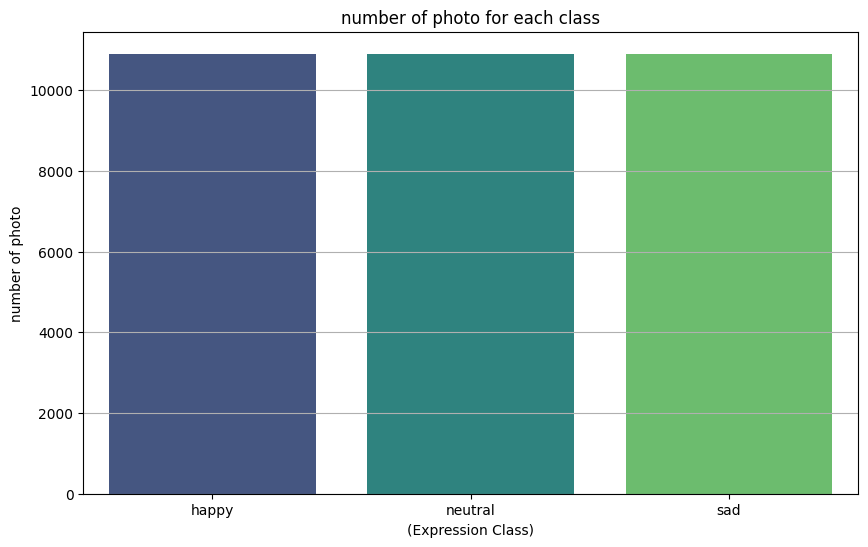

In [29]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = r"C:\Users\kirolosAnwar\Desktop\AMIT\balanced_dataset"
class_names = os.listdir(data_dir)
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        count = len(os.listdir(class_path))
        class_counts[class_name] = count

# ترتيب حسب عدد الصور
class_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# رسم الرسم البياني
plt.figure(figsize=(10, 6))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette="viridis")

plt.title("number of photo for each class")
plt.xlabel("(Expression Class)")
plt.ylabel("number of photo")
plt.grid(axis='y')
plt.show()

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization
from sklearn.model_selection import train_test_split
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(70,70,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()



C:\Users\kirolosAnwar\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 68, 68, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 904,067 (3.45 MB)

 Trainable params: 904,067 (3.45 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=50
)


Epoch 1/50


C:\Users\kirolosAnwar\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


819/819 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.3515 - loss: 1.7433 - val_accuracy: 0.3884 - val_loss: 1.0914
Epoch 2/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.3820 - loss: 1.0915 - val_accuracy: 0.3508 - val_loss: 1.0970
Epoch 3/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.4068 - loss: 1.0784 - val_accuracy: 0.5122 - val_loss: 0.9898
Epoch 4/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.4856 - loss: 1.0173 - val_accuracy: 0.5284 - val_loss: 0.9555
Epoch 5/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.5180 - loss: 0.9696 - val_accuracy: 0.5601 - val_loss: 0.9119
Epoch 6/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.5540 - loss: 0.9261 - val_accuracy: 0.5968 - val_loss: 0.8602
Epoch 7/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 32s 39ms/step - accuracy: 0.5809 - loss: 0.8884 - val_accuracy: 0.6142 - val_loss: 0.8192
Epoch 8/50
819/819 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.5924 - loss: 0.8630 - val_accurac

In [32]:
from sklearn.metrics import classification_report

# الحصول على التوقعات لكل الصور في مجموعة الـ validation
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)

# الحصول على التسميات الحقيقية
y_true = val_data.classes

# أسماء الكلاسات حسب الترتيب
class_labels = list(val_data.class_indices.keys())

# طباعة تقرير الدقة والتقييم
report = classification_report(y_true, y_pred_classes, target_names=class_labels)
print(report)


205/205 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step
              precision    recall  f1-score   support

       happy       0.32      0.33      0.32      2181
     neutral       0.32      0.32      0.32      2181
         sad       0.33      0.32      0.32      2181

    accuracy                           0.32      6543
   macro avg       0.32      0.32      0.32      6543
weighted avg       0.32      0.32      0.32      6543



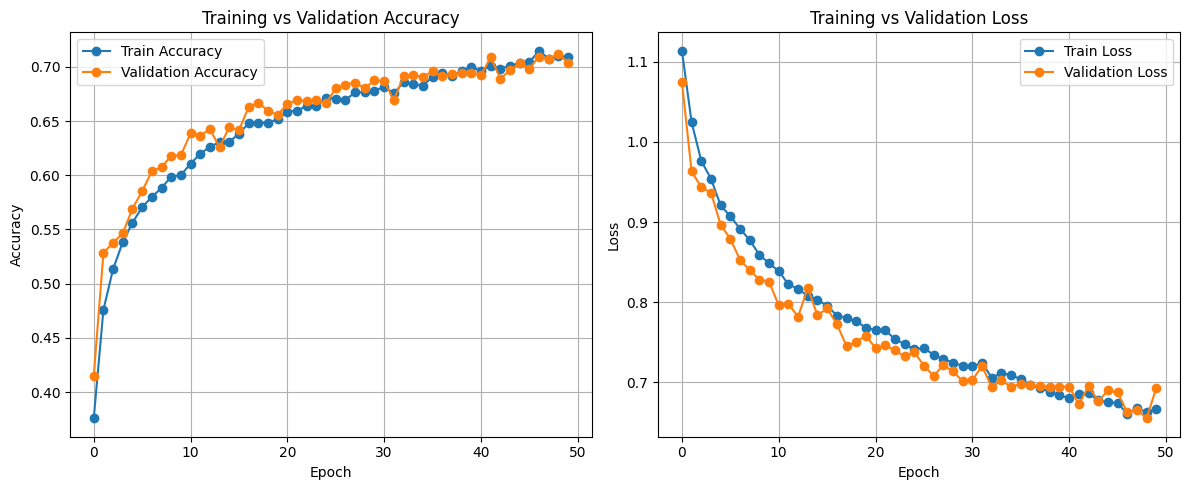

In [15]:
import matplotlib.pyplot as plt
# رسم دقة التدريب والاختبار
plt.figure(figsize=(12, 5))

# --- Accuracy Plot ---
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# --- Loss Plot ---
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



In [ ]:
model.save("expression_model.h5")


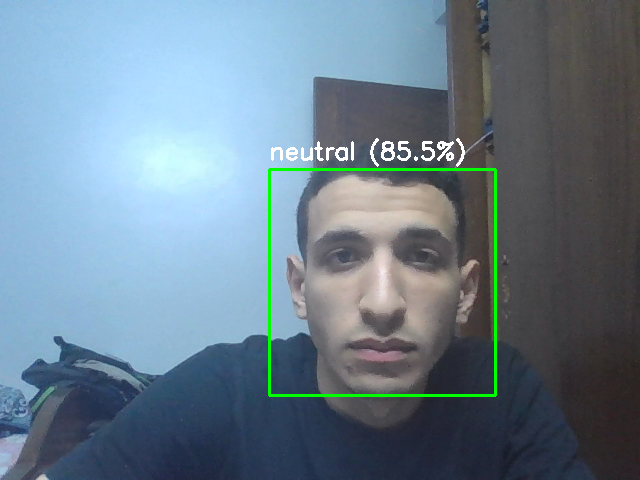

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from IPython.display import display, clear_output
from PIL import Image
import time

model = load_model("expression_model.h5")
class_labels = [ 'happy', 'neutral', 'sad']
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face = gray[y:y+h, x:x+w]
            face = cv2.resize(face, (45, 45))
            face = face.astype("float32") 
            face = np.expand_dims(face, axis=-1)
            face = np.expand_dims(face, axis=0)

            preds = model.predict(face)[0]
            label = class_labels[np.argmax(preds)]
            confidence = np.max(preds)

            text = f"{label} ({confidence*100:.1f}%)"
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
            cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255,255,255), 2)

        # تحويل frame لـ RGB علشان يظهر صح في Jupyter
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img_pil = Image.fromarray(rgb_frame)

        clear_output(wait=True)
        display(img_pil)

        time.sleep(0.1)  # علشان المخرجات متتلغبطش

except KeyboardInterrupt:
    pass

cap.release()
